In [5]:
from PIL import Image
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt 
from os import path, getcwd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
# all functions 
def get_soup(webpage):
    """ get data for web page"""
    r = requests.get(webpage) 
    soup = BeautifulSoup(r.content, 'html.parser')  
    return soup 

def get_links(soup): 
    """ Get links to transcripts from web page """
    http_link_list = [] 
    for link in soup.find_all(class_="audio-tool audio-tool-transcript"):
        http_link_list.append(link.a.get('href'))
    return http_link_list

def get_ptags(soup):
    """get <p> tags from web page"""
    http_link_list = [] 
    for link in soup.find_all('p'):
        http_link_list.append(link.get_text())
    return http_link_list 

def get_all_episode_text(episode_list):
    """get text for all episodes in list""" 
    text_return = []
    for episode in episode_list: 
        soup = get_soup(episode)
        text_array = get_ptags(soup)
        #full_text = get_text(text_array)
        text_return.append(text_array)
    return text_return

# every episode has a list of text. Append all the lists 
#together and make a single string
def conv_list_to_str(episode_list):
    '''return a string of text for each episode. Store these transcripts in a list 
    also remove prefix before interviewer or interviewee transcript.'''
    all_episodes = []
    for episode in episode_list: 
        episode_str = ''
        for line in episode:
            input_str = str(line)
            output_str = re.sub(r'^.*?:', ' ', input_str)
            episode_str += output_str 
        all_episodes.append(episode_str)
        episode_str = ''
        
    return all_episodes 

def rm_stop_punctuation(episode_strings): 
    """remove punctuation and stop words""" 
    filtered_allepisodes = []
    stop_words = set(stopwords.words('english'))
    
    for text in episode_strings:
        filtered_oneepisode = []
        word_tokens = word_tokenize(text)
        for w in word_tokens: 
            if w not in stop_words and w.isalpha():
                filtered_oneepisode.append(w.lower())
        filtered_allepisodes.append(filtered_oneepisode)
        filtered_oneepisode=[]
    
    return filtered_allepisodes

there are 5 episodes total


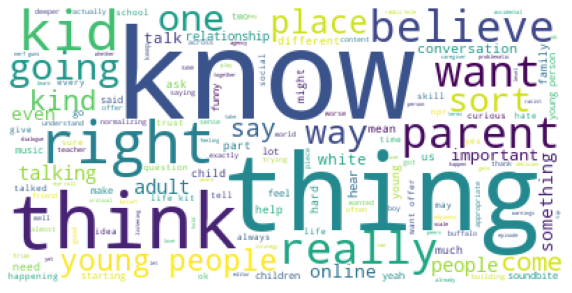

In [26]:

# webpage 
url = "https://www.npr.org/podcasts/510338/all-guides"
episode_url = "https://www.npr.org/transcripts/1107456623"

#gets word soup from website 
soupout = get_soup(url)

# get list of transcript links 
link_list = get_links(soupout)
print("there are " + str(len(link_list)) + " episodes total")

# get list of all episode text 
text_return = get_all_episode_text(link_list)

# every episode has a list of text. Append all the lists together and make a single string
episode_strings = conv_list_to_str(text_return)

#removed punctuation and stop words
filteredlst = rm_stop_punctuation(episode_strings)

#get the working directory 
#d = getcwd()

#numpy image file of mask image 
#mask_logo = np.array(Image.open(path.join(d, "lifekit_logo.png")))

# create the world cloud object 
wc = WordCloud(background_color="white", max_words=2000, max_font_size=90, random_state=1, stopwords = STOPWORDS)
first_episode = ' '.join(filteredlst[1])
wc.generate(first_episode)

#image_colors = ImageColorGenerator(mask_logo)
plt.figure(figsize=[10,10])
plt.imshow(wc) #(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()